In [29]:
# modules to install
!pip install kagglehub
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

In [7]:
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("sgpjesus/bank-account-fraud-dataset-neurips-2022")

# Print where it was downloaded
print("Downloaded to:", path)
print("Absolute Path:", os.path.abspath(path))

# = = =  move the files into dataset folder
import shutil

# Where you want to move the dataset
target_directory = "dataset"

# Create the directory if it doesn't exist
os.makedirs(target_directory, exist_ok=True)

# Move the dataset
shutil.move(path, target_directory)

print("Dataset moved to:", os.path.abspath(target_directory))


Downloaded to: /Users/xinhui/.cache/kagglehub/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/versions/2
Absolute Path: /Users/xinhui/.cache/kagglehub/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/versions/2
Dataset moved to: /Users/xinhui/Desktop/Y2T2/INF2008 Machine Learning/fraud-buster/src/dataset


In [5]:
import pandas as pd
import os

base_csv = pd.read_csv('dataset/2/Base.csv')
base_csv

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [ ]:
base_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [10]:
# check if there are any duplicates
base_csv.duplicated().sum()

np.int64(0)

In [ ]:
# handling missing values
# drop columns with too many missing values
base_csv = base_csv.dropna(thresh = len(base_csv)*0.5, axis = 1)

# enumerate columns: payment_type, employment_status, housing_status, source, device_os
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
base_csv['payment_type'] = le.fit_transform(base_csv['payment_type'])
base_csv['employment_status'] = le.fit_transform(base_csv['employment_status'])
base_csv['housing_status'] = le.fit_transform(base_csv['housing_status'])
base_csv['source'] = le.fit_transform(base_csv['source'])
base_csv['device_os'] = le.fit_transform(base_csv['device_os'])

# fill in all na values so that it is averaged out
base_csv.fillna(base_csv.median(), inplace = True)
base_csv

In [23]:
base_csv.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1.232363,1572.692049,...,0.222988,515.851010,0.025242,0.007048,7.544940,1.558712,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,0.966580,1005.374565,...,0.416251,487.559902,0.156859,0.083656,8.033106,1.217521,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,0.000000,1.000000,...,0.000000,190.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,0.000000,894.000000,...,0.000000,200.000000,0.000000,0.000000,3.103053,0.000000,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1.000000,1263.000000,...,0.000000,200.000000,0.000000,0.000000,5.114321,2.000000,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,2.000000,1944.000000,...,0.000000,500.000000,0.000000,0.000000,8.866131,3.000000,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,4.000000,6700.000000,...,1.000000,2100.000000,1.000000,1.000000,85.899143,4.000000,1.000000,2.000000,0.0,7.000000


fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64


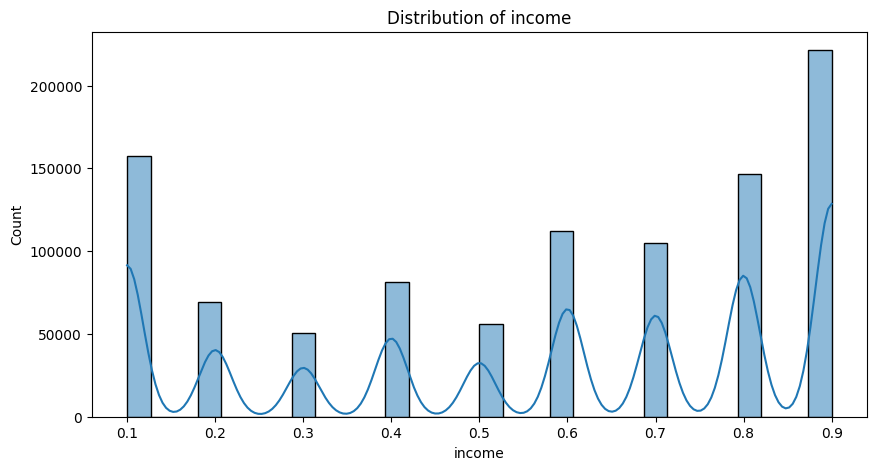

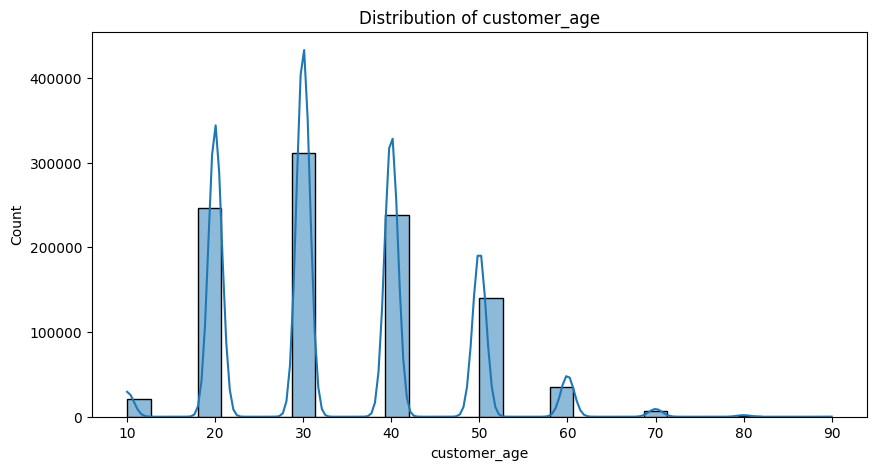

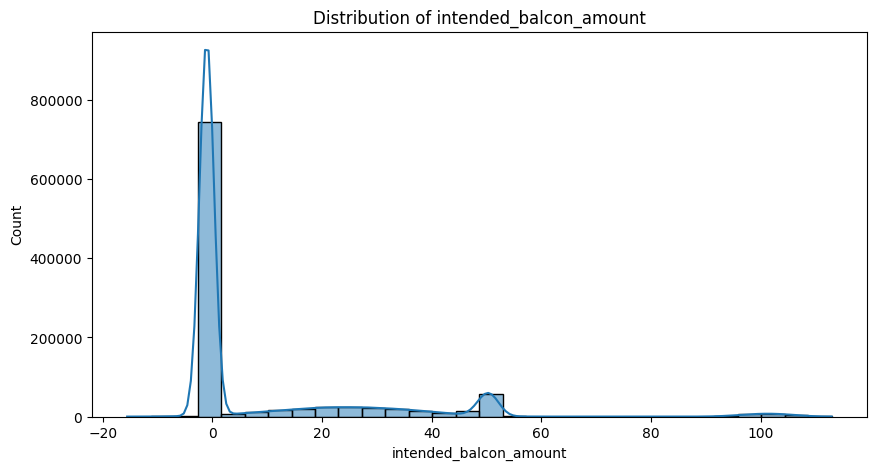

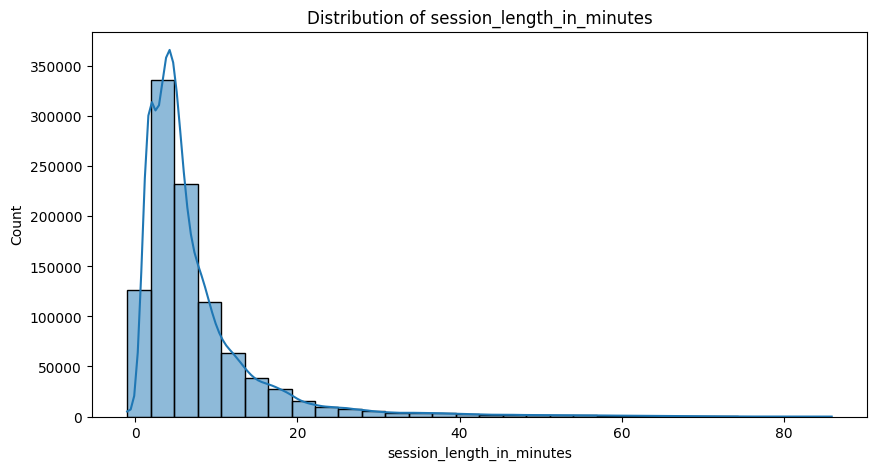

In [28]:
print(base_csv['fraud_bool'].value_counts(normalize=True))
# OUTPUT: fraud_bool
# 0    0.988971
# 1    0.011029
# Name: proportion, dtype: float64

# visualise distributions
import seaborn as sns
import matplotlib.pyplot as plt

# visualise the distribution of features
numerical_features = ['income', 'customer_age', 'intended_balcon_amount', 'session_length_in_minutes']
for feature in numerical_features:
    plt.figure(figsize = [10, 5])
    sns.histplot(base_csv[feature], bins=30, kde = True)
    plt.title(f'Distribution of {feature}')
    plt.show()

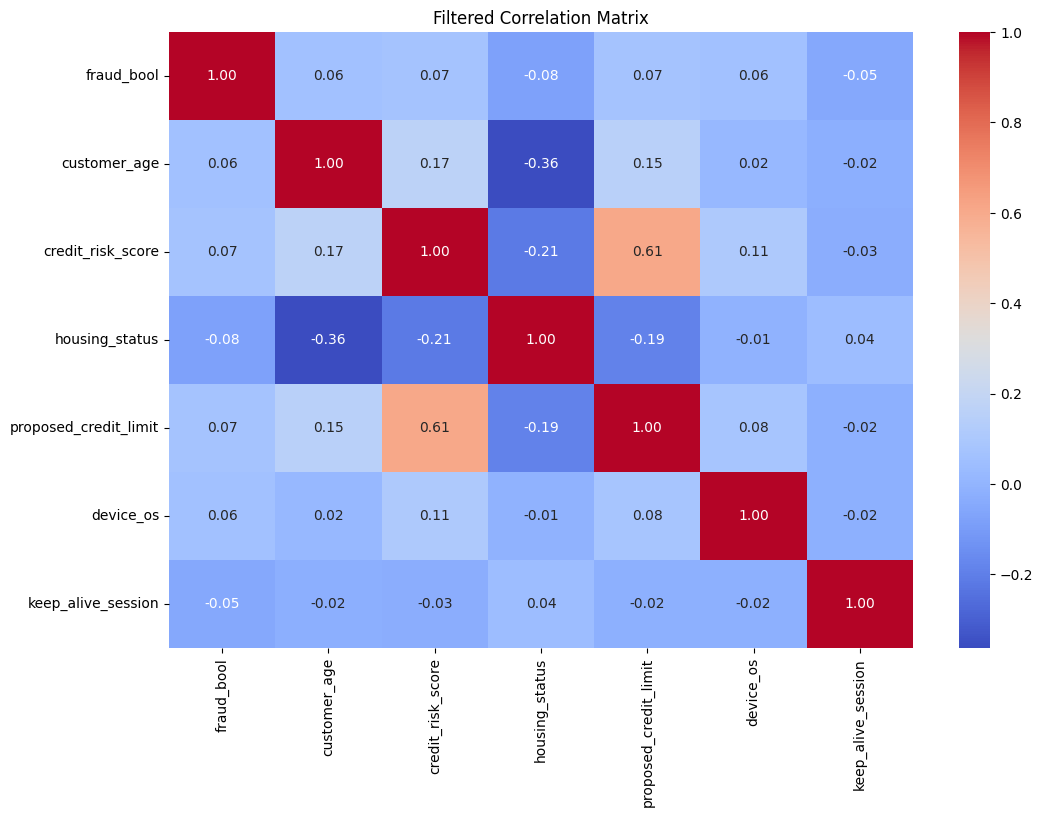

In [ ]:
# visualise correlation matrix
corr_matrix = base_csv.corr()

# Calculate correlations with the target
target_corr = corr_matrix['fraud_bool'].abs()

# Select only features with high correlation
high_corr_features = target_corr[target_corr > 0.05].index 
# NOTE: 0.05 is already considered as very weak, but we shall just take these (higher priority) since
# there is more correlation compared to the others

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix.loc[high_corr_features, high_corr_features]

# Visualize the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Matrix')
plt.show()


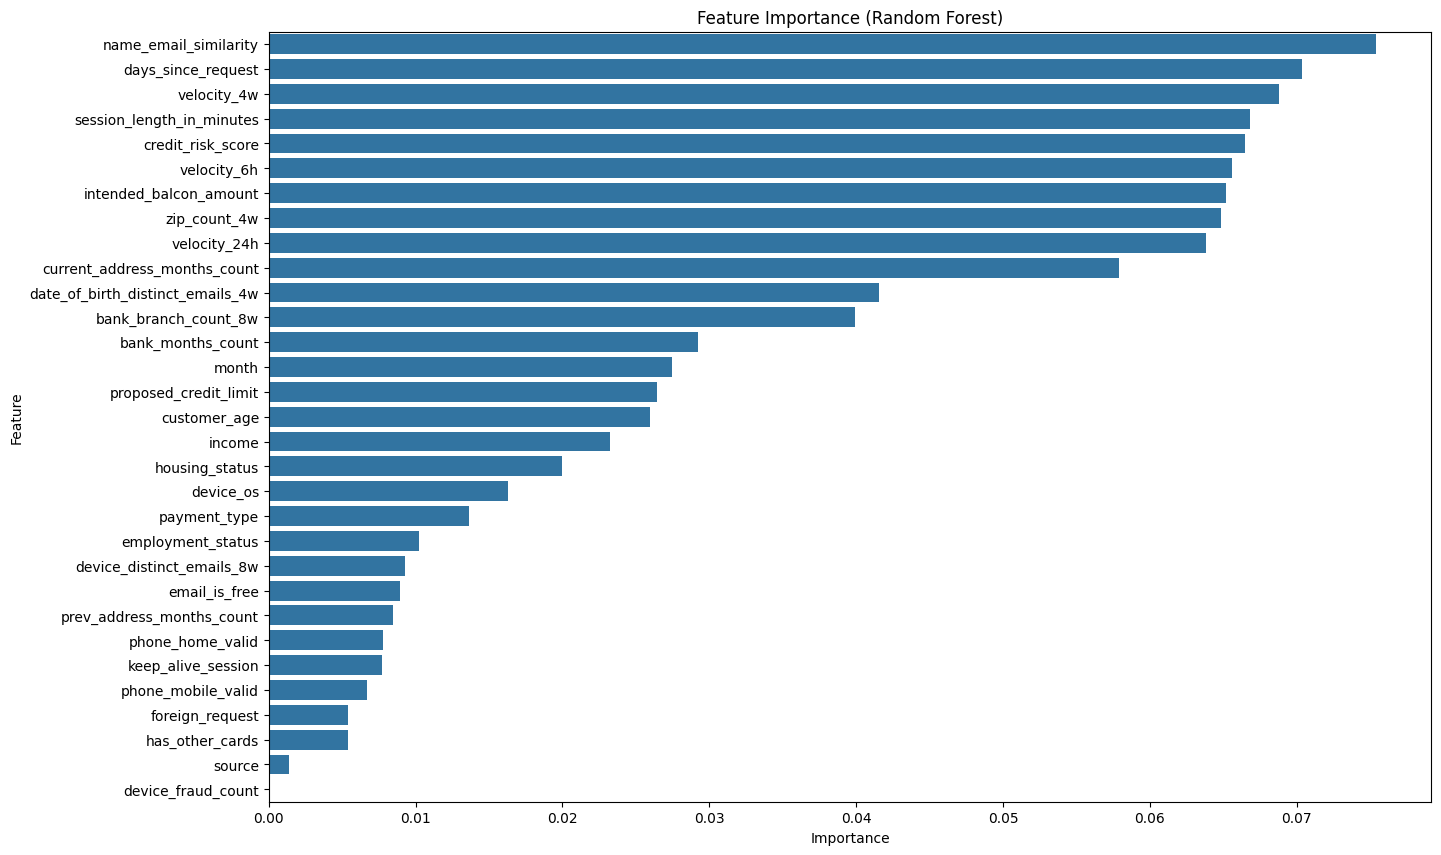

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (example)
base_csv['credit_risk_score'] = LabelEncoder().fit_transform(base_csv['credit_risk_score'])

# Split the data
X = base_csv.drop('fraud_bool', axis=1)
y = base_csv['fraud_bool']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
importance_base_csv = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_base_csv = importance_base_csv.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=importance_base_csv)
plt.title('Feature Importance (Random Forest)')
plt.show()
